In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from  sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
X_2d = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size = 0.2, random_state=47)

In [3]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [4]:
X_2d

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]])

In [118]:
len(X_train)

455

In [90]:
clf = SVC(C=0.01)
 
clf.fit(X_train, y_train)
 
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.6945054945054945
0.6666666666666666


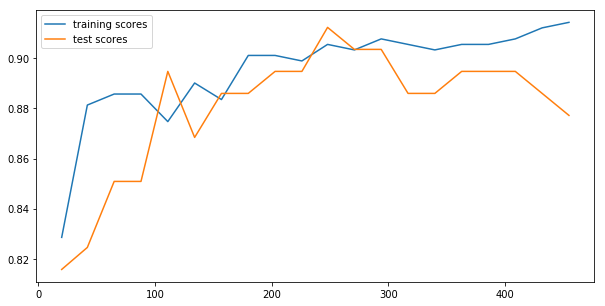

In [91]:
training_scores = []
test_scores = []
numbers = []
 
for i in np.linspace(20, len(X_train), 20):
    
    clf = SVC(C=10, kernel='rbf')
    X = X_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    
    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    
plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

Чем больше данных для обучения и теста модели, тем лучше модель.

1) При увеличении количества наблюдений качество модели может вырасти.

2) При добавлении новых признаков в модель есть шансы улучшения ее качества.

3) Это же касается и полиномиальных признаков.

4) Более сложные модели вполне могут улучшить качество предсказания.

5) Действия с регуляризацией в данном случае не приведут к улучшению модели.

In [92]:
df = pd.DataFrame(X[:, :2])
df['y'] = y
df.corr()

,0,1,y
0,1.000000,0.317126,-0.730193
1,0.317126,1.000000,-0.405756
y,-0.730193,-0.405756,1.000000


In [109]:
rfclf = RandomForestClassifier()
params = {
    'n_estimators': [100,150,200,300,500, 1000],
    'criterion': ['gini', 'entropy'],
    'max_depth': [4,5,6,7,10],
    'min_samples_split': [2,3,4,5],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample'],
}

In [110]:
gscv = GridSearchCV(rfclf, params, n_jobs = -1, verbose = 1, cv=3)

In [111]:
gscv.fit(X_train, y_train)

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  8.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              warm_start=False),
             iid='deprecated', n_jobs=-1,
    

In [138]:
gscv.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 200}

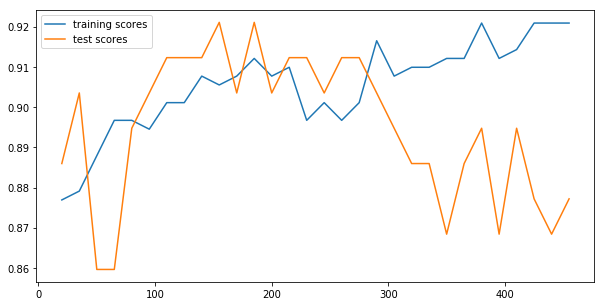

In [142]:
training_scores = []
test_scores = []
numbers = []
clf = RandomForestClassifier(
        class_weight  = 'balanced',
         criterion  = 'entropy',
         max_depth  = 3,
         max_features  = 'sqrt',
         min_samples_split = 10,
         n_estimators  = 300)
for i in np.linspace(20, len(X_train), 30):
    X = X_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    
    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

In [143]:
clf = RandomForestClassifier(max_depth=3)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9164835164835164
0.8771929824561403


Повторите предыдущий пункт для различных значений C в диапазоне от 0,0001 до 1 000 000. Обратите внимание на шкалу по вертикальной оси. Для каких значений тестовая точность оптимальна? Какие значения дают недообучение? Какие - переобучение?

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131]
[0.0001, 0.0101, 0.0201, 0.0301, 0.0401, 0.0501, 0.0601, 0.0701, 0.0801, 0.0901, 0.1001, 0.1101, 0.1201, 0.1301, 0.1401, 0.1501, 0.1601, 0.1701, 0.1801, 0.1901, 0.2001, 0.2101, 0.2201, 0.2301, 0.2401, 0.2501, 0.2601, 0.2701, 0.2801, 0.2901, 0.3001, 0.3101, 0.3201, 0.3301, 0.3401, 0.3501, 0.3601, 0.3701, 0.3801, 0.3901, 0.4001, 0.4101, 0.4201, 0.4301, 0.4401, 0.4501, 0.4601, 0.4701, 0.4801, 0.4901, 0.5001, 0.5101, 0.5201, 0.5301, 0.5401, 0.5501, 0.5

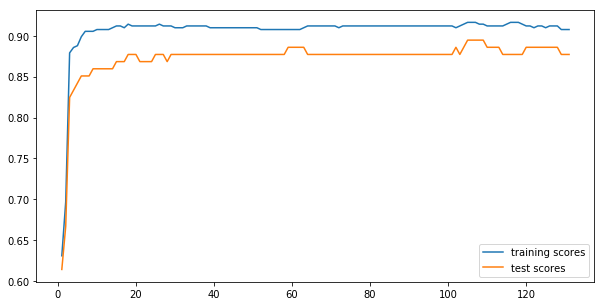

In [144]:
training_scores = []
test_scores = []
C = [i/10000 for i in range(1, 10000, 100)]
M = [i for i in range(1,100, 5)]
N = [i for i in range(100,1000000, 100000)]
for i in M:
    C.append(i)
for i in N:
    C.append(i)
C.append(1000000)
numbers = []
kek = 0

for c in C:
    kek += 1
    clf = SVC(c, kernel='rbf')
    clf.fit(X_train, y_train)
    numbers.append(kek)
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

print(numbers)
print(C)
print(training_scores)
print(test_scores)

На оси х - айди итерации. Чтоб более адекватный график был.

Cfloat, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
Вкратце- это параметр регуляризации. Судя по графику, оптимальное значение С=1. В данном случае чем выше степень регуляризации, тем лучше предсказание на тестовом множестве. Оптимально- на единице.

In [147]:
clf = SVC(C=1, kernel='rbf')
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9120879120879121
0.8771929824561403


In [148]:
clf = SVC(C=1000000, kernel='rbf')
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9076923076923077
0.8771929824561403


In [149]:
clf = SVC()
params = {'C': C, 'kernel': ['rbf', 'linear']}
gscv = GridSearchCV(clf, params, n_jobs = -1, verbose = 1, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

Fitting 3 folds for each of 262 candidates, totalling 786 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 786 out of 786 | elapsed:  3.4min finished


{'C': 0.2601, 'kernel': 'rbf'}

In [152]:
clf = SVC(C= 0.2601, kernel= 'rbf').fit(X_train, y_train)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9120879120879121
0.8771929824561403


Лучше модель с rbf ядром.

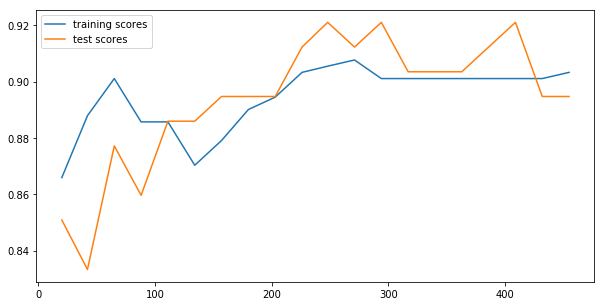

In [153]:
training_scores = []
test_scores = []
numbers = []
clf = SVC(degree=3, kernel='poly')

for i in np.linspace(20, len(X_train), 20):
    
    X = X_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    
    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    
plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

Что очевидно, полином справляется с задачей лучше линейного ядра. В данном случае при степени свободы 3 сложно сильно переобучить модель, поэтому можно считать ее близкой к эталонной.

1
3
5
7
[1, 3, 5, 7]
[1, 3, 5, 7]
[0.8901098901098901, 0.9032967032967033, 0.9120879120879121, 0.8791208791208791]
[0.8859649122807017, 0.8947368421052632, 0.8771929824561403, 0.8596491228070176]


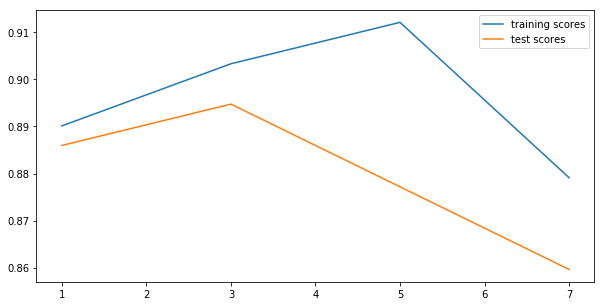

In [4]:
training_scores = []
test_scores = []
numbers = []
degrees = [i for i in range(1,8, 2)]

for degree in degrees:
    clf = SVC(degree = degree, kernel='poly')
    clf.fit(X_train, y_train)
    numbers.append(degree)
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    print(degree)

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

print(numbers)
print(degrees)
print(training_scores)
print(test_scores)

В этом же примере видно, что при повышении степени полинома, мы недообучиваем модель, что не есть хорошо. Оптимальная степень-3. Забавный факт- по дефолту стоит именно 3. Совпадение? Не думаю!)

Другие модели и другие гиперпараметры в студию:

[3, 5, 7, 9, 11, 13, 15, 17, 19]
[1, 3, 5, 7]
[0.9230769230769231, 0.9362637362637363, 0.9758241758241758, 0.9978021978021978, 1.0, 1.0, 0.9978021978021978, 1.0, 1.0]
[0.868421052631579, 0.868421052631579, 0.8421052631578947, 0.8508771929824561, 0.8508771929824561, 0.8508771929824561, 0.8508771929824561, 0.8508771929824561, 0.8596491228070176]


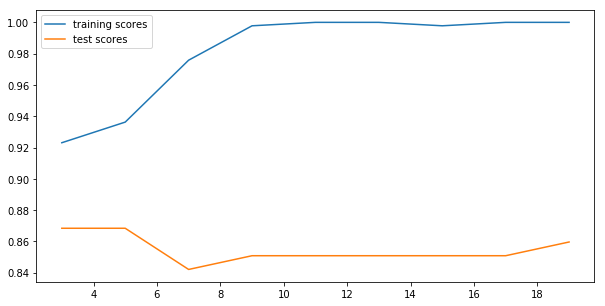

In [8]:
training_scores = []
test_scores = []
numbers = []
max_depths = [i for i in range(3,20, 2)]

for max_depth in max_depths:
    clf = RandomForestClassifier(max_depth = max_depth)
    clf.fit(X_train, y_train)
    numbers.append(max_depth)
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

print(numbers)
print(degrees)
print(training_scores)
print(test_scores)

Чем больше глубина спуска, тем сильнее каждыя модель из ансамбля рандомных деревьев переобучается на нашем датасете. Из за того, что фичи всего 2, рандом форест на этой задаче работает плохо. Больше фичей в студию и тогда поговорим!

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[1.0, 0.9252747252747253, 0.9340659340659341, 0.9120879120879121, 0.9142857142857143, 0.9120879120879121, 0.9076923076923077, 0.9054945054945055, 0.9010989010989011, 0.9098901098901099, 0.9010989010989011, 0.9032967032967033, 0.9076923076923077, 0.9054945054945055, 0.9010989010989011, 0.9032967032967033, 0.9054945054945055, 0.9010989010989011, 0.9032967032967033]
[0.8508771929824561, 0.8421052631578947, 0.8157894736842105, 0.8421052631578947, 0.8421052631578947, 0.8333333333333334, 0.8508771929824561, 0.868421052631579, 0.8771929824561403, 0.8771929824561403, 0.868421052631579, 0.8859649122807017, 0.868421052631579, 0.8859649122807017, 0.8771929824561403, 0.9035087719298246, 0.8947368421052632, 0.9035087719298246, 0.8947368421052632]


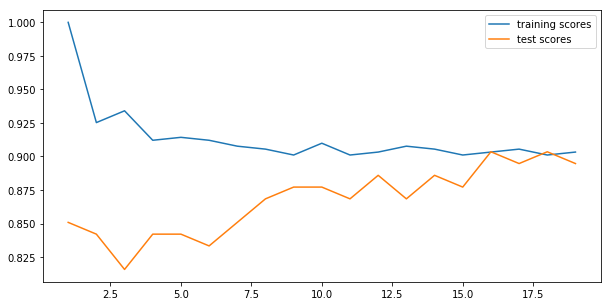

In [22]:
training_scores = []
test_scores = []
numbers = []
params = [i for i in range(1,20)]

for param in params:
    clf = KNeighborsClassifier(n_neighbors=param)
    clf.fit(X_train, y_train)
    numbers.append(param)
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

print(numbers)
print(params)
print(training_scores)
print(test_scores)

Чем большее количество ближайших соседей нас интересует при классифицировании конкретной точки, тем больше сходятся наши трейны и тесты. На мой взгляд, оптимальное значение для данного параметра- 16

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131]
[0.0001, 0.0101, 0.0201, 0.0301, 0.0401, 0.0501, 0.0601, 0.0701, 0.0801, 0.0901, 0.1001, 0.1101, 0.1201, 0.1301, 0.1401, 0.1501, 0.1601, 0.1701, 0.1801, 0.1901, 0.2001, 0.2101, 0.2201, 0.2301, 0.2401, 0.2501, 0.2601, 0.2701, 0.2801, 0.2901, 0.3001, 0.3101, 0.3201, 0.3301, 0.3401, 0.3501, 0.3601, 0.3701, 0.3801, 0.3901, 0.4001, 0.4101, 0.4201, 0.4301, 0.4401, 0.4501, 0.4601, 0.4701, 0.4801, 0.4901, 0.5001, 0.5101, 0.5201, 0.5301, 0.5401, 0.5501, 0.5

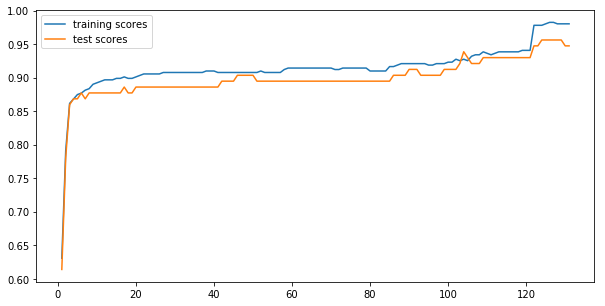

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=47)
training_scores = []
test_scores = []
C = [i/10000 for i in range(1, 10000, 100)]
M = [i for i in range(1,100, 5)]
N = [i for i in range(100,1000000, 100000)]
for i in M:
    C.append(i)
for i in N:
    C.append(i)
C.append(1000000)
numbers = []
kek = 0

for c in C:
    kek += 1
    clf = SVC(c, kernel='rbf')
    clf.fit(X_train, y_train)
    numbers.append(kek)
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

print(numbers)
print(C)
print(training_scores)
print(test_scores)

При большем количестве фичей качество модели заметно выросло, что не удивительно. Так же при высоких значениях регуляризации достигается и пик предсказательной силы модели.

Ниже- Случайный Лес. Проверим его.

[2, 3, 4, 5, 6, 7, 8, 9]
[1, 3, 5, 7]
[0.967032967032967, 0.9802197802197802, 0.9868131868131869, 0.9934065934065934, 0.9956043956043956, 0.9978021978021978, 1.0, 1.0]
[0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315]


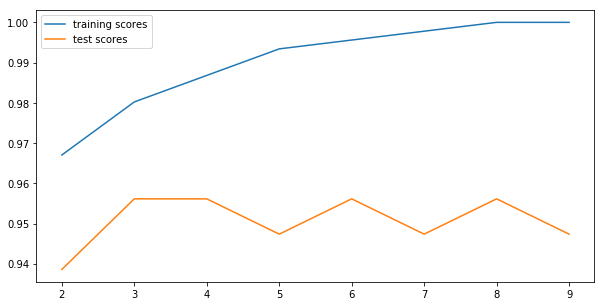

In [27]:
training_scores = []
test_scores = []
numbers = []
max_depths = [i for i in range(2,10)]

for max_depth in max_depths:
    clf = RandomForestClassifier(max_depth = max_depth)
    clf.fit(X_train, y_train)
    numbers.append(max_depth)
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

print(numbers)
print(degrees)
print(training_scores)
print(test_scores)

In [28]:
rfclf = RandomForestClassifier()
params = {
    'n_estimators': [100,200,300,500, 750, 1000],
    'criterion': ['gini', 'entropy'],
    'max_depth': [4,5,7,10],
    'min_samples_split': [2,4,7],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample'],
}

In [29]:
gscv = GridSearchCV(rfclf, params, n_jobs = -1, verbose = 1, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 2592 out of 2592 | elapsed:  8.2min finished


{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 100}

In [30]:
print(gscv.score(X_train, y_train))
print(gscv.score(X_test, y_test))

1.0
0.9736842105263158


Случайный лес справился отлично.

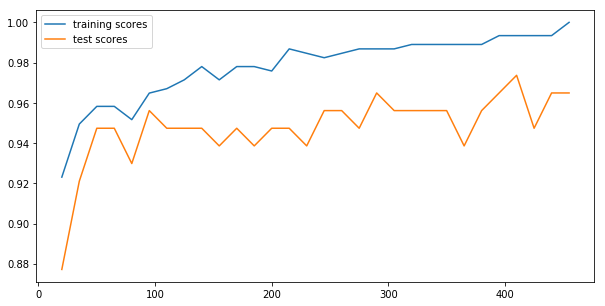

In [39]:
training_scores = []
test_scores = []
numbers = []
clf = RandomForestClassifier(
        class_weight  = 'balanced_subsample',
         criterion  = 'entropy',
         max_depth  = 7,
         max_features  = 'sqrt',
         min_samples_split = 2,
         n_estimators  = 100)
for i in np.linspace(20, len(X_train), 30):
    X = X_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    
    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

Нашел Датасет С классификацией грибов. Ан подходит под Ваши условия как нельзя лучше.

In [41]:
dataset=pd.read_csv("mushrooms.csv")
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [42]:
X=dataset.drop('class',axis=1) #Predictors
y=dataset['class'] #Response
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [48]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

In [50]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,y_train)

c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9509

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2951
           1       0.96      0.94      0.95      2735

    accuracy                           0.95      5686
   macro avg       0.95      0.95      0.95      5686
weighted avg       0.95      0.95      0.95      5686


Confusion Matrix:
[[2831  120]
 [ 159 2576]]

Average Accuracy:	0.9469

Standard Deviation:	0.0092


In [52]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9500

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1257
           1       0.95      0.94      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438


Confusion Matrix:
[[1200   57]
 [  65 1116]]



Препроцессинг частично взят с kaggle. Но лучше сделать я бы не смог.